In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/weights_heights.csv', index_col='Index')
df.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [3]:
df.shape

(25000, 2)

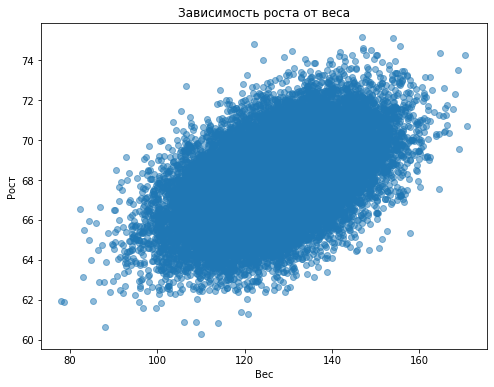

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(df['Weight'], df['Height'], alpha=0.5)
plt.xlabel('Вес')
plt.ylabel('Рост')
label = "Зависимость роста от веса"
plt.title(str(label))
plt.show()

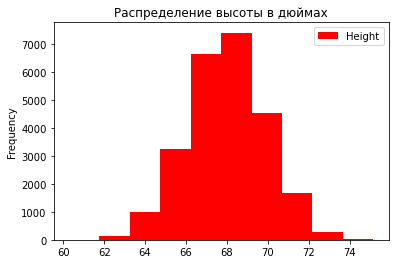

In [5]:
df.plot(y='Height', kind='hist', 
        color='red', title='Распределение высоты в дюймах');

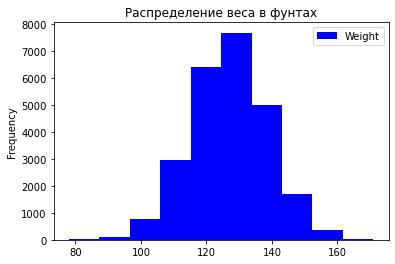

In [6]:
df.plot(y='Weight', kind='hist', 
        color='blue', title='Распределение веса в фунтах');

## Масштабирование данных
Так как регрессионные модели очень чувствительны к выбросам и данным разных масшабов, лучше отмасштабировать признаки
Для этого воспользуемся MinMaxScaler:
$$  \frac{x-min(x)}{max(x)-min(x)}$$

In [7]:
scaler = MinMaxScaler()

X = df['Weight'].values.reshape(-1, 1)
y = df['Height'].values.reshape(-1, 1)

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled,
                                                    test_size=0.3, random_state=42)

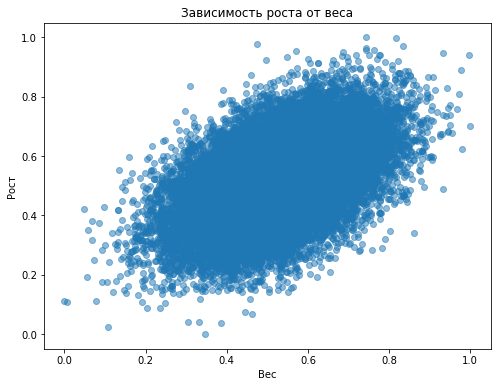

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(X_scaled, y_scaled, alpha=0.5)
plt.xlabel('Вес')
plt.ylabel('Рост')
label = "Зависимость роста от веса"
plt.title(str(label))
plt.show()

Как видно из графика выше, оба признака теперь имеют значения в интервале [0,1] и при этом зависимоть между ними сохранилась

## Обучение модели

Для обучения возьмем 3 модели <b>LinearRegression, KNeighborsRegressor и RandomForestRegressor</b> и обучим их, посмотрим какая будет лучше предсказывать рост по весу. В качестве метрики качества будем использовать MSE.

### LinearRegression

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(lr_pred, y_test)
print(f'MSE = {lr_mse:.3f}')

MSE = 0.012


### KNeighborsRegressor

In [12]:
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [13]:
knr_pred = knr.predict(X_test)
knr_mse = mean_squared_error(knr_pred, y_test)
print(f'MSE = {knr_mse:.3f}')

MSE = 0.015


### RandomForestRegressor

In [14]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
rfr_pred = rfr.predict(X_test)
rfr_mse = mean_squared_error(rfr_pred, y_test)
print(f'MSE = {rfr_mse:.3f}')

MSE = 0.018


## Графики и выводы

In [16]:
pd.DataFrame(data={'MSE':[lr_mse, knr_mse, rfr_mse]},
             index=['LinearRegression', 'KNeighborsRegressor', 'RandomForestRegressor'])

,MSE
LinearRegression,0.012321
KNeighborsRegressor,0.014550
RandomForestRegressor,0.017892


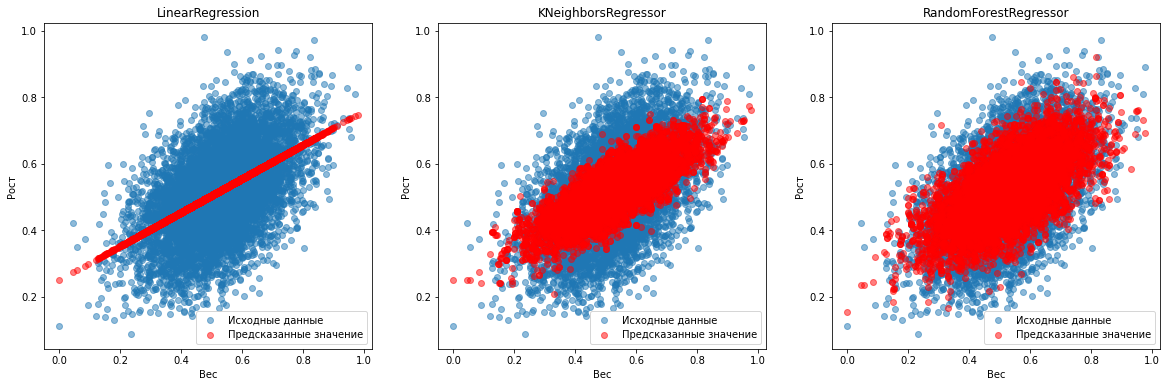

In [17]:
fig,(ax1, ax2, ax3)= plt.subplots(nrows=1, ncols=3, figsize=(20,6))

ax1.scatter(X_test, y_test, alpha=0.5, label='Исходные данные')
ax1.scatter(X_test, lr_pred, alpha=0.5, color='r', label='Предсказанные значение')
ax1.set_xlabel('Вес')
ax1.set_ylabel('Рост')
ax1.set_title('LinearRegression')
ax1.legend()

ax2.scatter(X_test, y_test, alpha=0.5, label='Исходные данные')
ax2.scatter(X_test, knr_pred, alpha=0.5, color='r', label='Предсказанные значение')
ax2.set_xlabel('Вес')
ax2.set_ylabel('Рост')
ax2.set_title('KNeighborsRegressor')
ax2.legend()

ax3.scatter(X_test, y_test, alpha=0.5, label='Исходные данные')
ax3.scatter(X_test, rfr_pred, alpha=0.5, color='r', label='Предсказанные значение')
ax3.set_xlabel('Вес')
ax3.set_ylabel('Рост')
ax3.set_title('RandomForestRegressor')
ax3.legend()

plt.show()